# 繪圖套件 matplotlib

## 優點：
- 相較於其他視覺化套件，matplot算是最歷史悠久
- 畫圖功能最齊全

## 缺點:
- 圖表不好看
- 畫圖指令複雜

## 使用 %pylab inline、%matplotlib inline宣告

### %pylab inline 宣告會載入以下套件，適用於ipython模式下
    - import numpy as np
    - import matplotlib.pyplot as plt
    
    
### %matplotlib inline 宣告不會載入以下套件，notebook模式下
    - import numpy as np
    - import matplotlib.pyplot as plt

- %pylab inline、%matplotlib inline可以省掉plt.show()，如果單獨使用 import matplotlib.pyplot as plt 繪圖就需要使用 plt.show()顯示圖
- 支持LaTex語法 [LaTeX](https://www.latex-project.org/)
- 線上文件 [matplotlib](http://matplotlib.org/index.html)

## [參考資料](https://matplotlib.org/api/artist_api.html#module-matplotlib.lines)

# matplotlib圖片

![](matplotlib_figure.png)
[圖片來源](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

# matplotlib繪圖無法支援中文字型

## 透過以下方式設定可在圖形上顯示中文字
1. 修改繪圖設定檔matplotlibrc
2. 參數字典 rcParams：動態修改繪圖設定檔
3. matplotlib.rc()
4. 動態載入系統中文字型

# 方法1：修改matplotlib繪圖設定檔
- matplotlib繪圖時，依據以下路徑順序尋找繪圖設定檔(matplotlibrc)位置，來進行繪圖相關屬性設定，如視圖視窗大小以及每英寸點數[dpi]，線條寬度，顏色和樣式，坐標軸，坐標和網格屬性，文本，字體等屬性
- 當前路徑：程式的當前路徑。
- 使用者設定路徑：在用戶資料夾的“.matplotlib”目錄下，透過環境變數matplotlibrc修改它的位置。
- 系統設定路徑：保存在matplotlib的安裝目錄下的mpl-data中。
- [matplotlib configuration and cache directory locations](https://matplotlib.org/faq/troubleshooting_faq.html#locating-matplotlib-config-dir)

In [2]:
#使用者設定路徑
import matplotlib 
matplotlib.get_configdir()

'C:\\Users\\Amin\\.matplotlib'

In [3]:
# 系統設定路徑
import matplotlib
print(matplotlib.matplotlib_fname())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


### matplotlib是支援unicode編碼的，出現的問題主要是沒有找到合適的中文字體，在matplotlib的繪圖設定檔中211行，可以看到字體的預設設置如下：
- #font.family         : sans-serif
- #font.sans-serif     : Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif

### 修改方式
- 跳至211行
- 移除 "#"
- 加入字型名稱
- 設修改後，要重啟Jupyter

# 方法2：參數字典 rcParams：動態修改繪圖設定檔

In [29]:
%pylab inline

#支援中文字顯示
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'  #用來正常顯示中文標籤，微軟雅黑體，['SimHei']
plt.rcParams['axes.unicode_minus'] = False #解決座標軸負數的負號顯示問題

Populating the interactive namespace from numpy and matplotlib


In [30]:
from matplotlib.font_manager import fontManager
import os
 
fonts = [font.name for font in fontManager.ttflist if 
         os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
 
for font in fonts:
    print(font)

Microsoft YaHei
Malgun Gothic
Arial Unicode MS
SimHei
Arial Unicode MS
Malgun Gothic
KaiTi
FangSong
Microsoft YaHei
DFKai-SB
Microsoft JhengHei
SimSun-ExtB
Microsoft JhengHei
Gabriola
Gabriola


Populating the interactive namespace from numpy and matplotlib


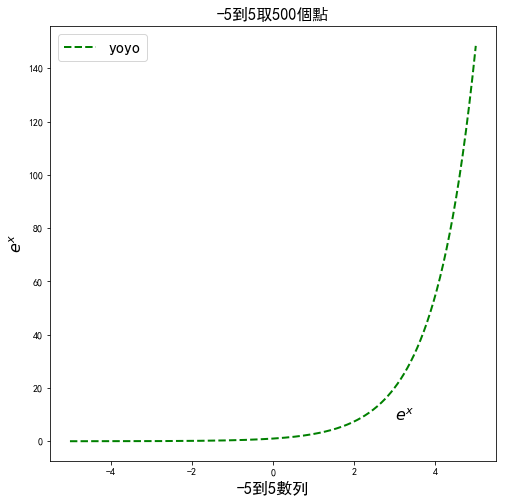

In [31]:
%pylab inline
import platform
import matplotlib

plt.rcParams['font.sans-serif'] = 'SimHei'  #用來正常顯示中文標籤，微軟雅黑體，['SimHei']
plt.rcParams['axes.unicode_minus'] = False #用來正常顯示正負號

#依據作業系統設定字型
sysstr = platform.system()
if(sysstr =="Windows"):
    if (platform.release == '7'):
        plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
    elif (platform.release == '8' or platform.release == '8.1'):
        plt.rcParams['font.sans-serif'] = 'SimHei'
    else:
        plt.rcParams['font.sans-serif'] = 'SimHei'
elif(sysstr == "Linux"):
    print ("Call Linux tasks")
elif(sysstr == "Darwin"):
    print ("Call Mac os tasks")    
else:
    print ("Other System tasks")    


x = np.linspace(-5,5,500)
y = power(e, x) 

plt.figure(figsize = (8,8)) 
plt.plot(x, y, 'g--', lw=2, label='yoyo')
plt.legend(loc='best', fontsize=16) 
plt.title(u'-5到5取500個點',fontsize=16)
plt.xlabel(u'-5到5數列', fontsize=16)
plt.ylabel(r'$e^x$', fontsize=16)
text(3, 7.5, r'$e^x$', fontsize=16)

Populating the interactive namespace from numpy and matplotlib


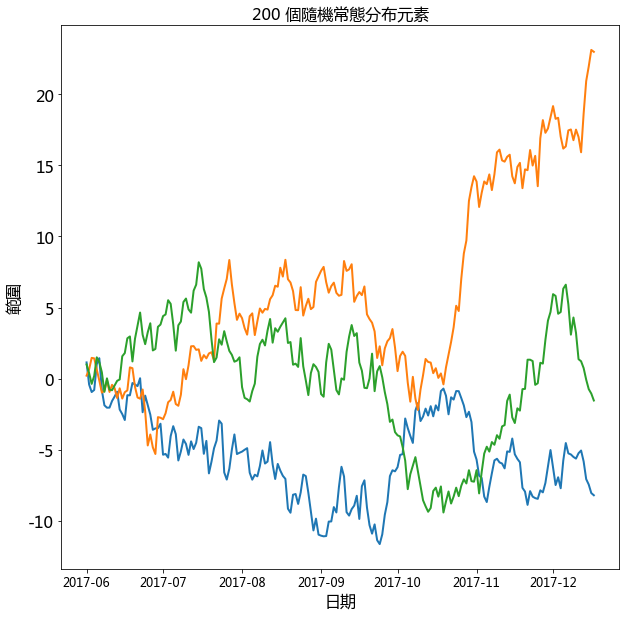

In [32]:
%pylab inline
import pandas as pd

plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'  #用來正常顯示中文標籤，微軟雅黑體，['SimHei']
plt.rcParams['axes.unicode_minus'] = False #用來正常顯示正負號
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['figure.figsize'] = (10, 10)

x = pd.period_range("2017-06-01", periods=200, freq='d')
x = x.to_timestamp().to_pydatetime() #to_pydatetime 是將 datetime64 轉 datetime
y = np.random.randn(200, 3).cumsum(0)# 產生三組，每組 200 個隨機常態分布元素

plt.plot(x, y)
plt.title(u'200 個隨機常態分布元素',fontsize=16)
plt.xlabel(u'日期', fontsize=16)
plt.ylabel(u'範圍', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=16)
#plt.savefig('sample.pdf')
savefig('sample.JPG', dpi=200) #可以存PNG、JPG、EPS、SVG、PGF、PDF

In [15]:
import numpy as np  
arr  = np.arange(12).reshape((2,2,3))  
print(arr)  
print("cumsum(0) = ", arr.cumsum(0))  
print("cumsum(1) = ", arr.cumsum(1))  
print("cumsum(2) = ", arr.cumsum(2))

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]
cumsum(0) =  [[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  8 10]
  [12 14 16]]]
cumsum(1) =  [[[ 0  1  2]
  [ 3  5  7]]

 [[ 6  7  8]
  [15 17 19]]]
cumsum(2) =  [[[ 0  1  3]
  [ 3  7 12]]

 [[ 6 13 21]
  [ 9 19 30]]]


# 方法3：參數matplotlib.rc()

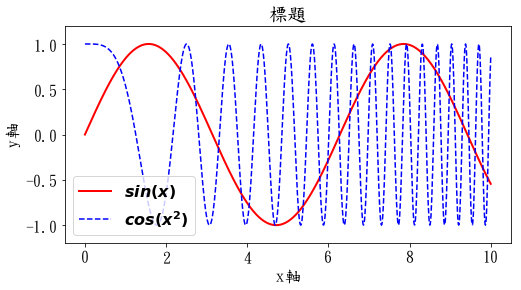

In [9]:
import numpy as np
import matplotlib.pyplot as plt

font = {'family' : 'DFKai-SB',
'weight' : 'bold',
'size'  : '16'}
plt.rc('font', **font)              # 步驟一（設定字型的更多屬性）
plt.rc('axes', unicode_minus=False) # 步驟二（解決座標軸負數的負號顯示問題）
x = np.linspace(0, 10, 1000)
y = np.sin(x)
z = np.cos(x**2)
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="$sin(x)$", color="red", linewidth=2)
plt.plot(x,z,"b--",label="$cos(x^2)$")
plt.xlabel("x軸")
plt.ylabel("y軸")
plt.title("標題")
plt.ylim(-1.2, 1.2)
plt.legend()
plt.show()

# 方法4：指定系統上中文字型路徑

In [33]:
#另一種指定中文字型方法
%pylab inline
import matplotlib.font_manager as fm
font = fm.FontProperties(fname='C:\Windows\Fonts\msjh.ttc', size=20)  # win10環境 ttf 要改為 ttc

Populating the interactive namespace from numpy and matplotlib


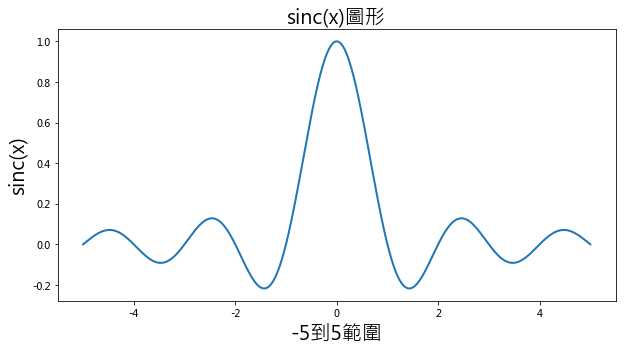

In [34]:
x = linspace(-5, 5, 2000)
plot(x, sinc(x))
plt.gcf().set_size_inches(10, 5)
plt.title(u'sinc(x)圖形', fontproperties = font)
plt.xlabel(u'-5到5範圍', fontproperties = font)
plt.ylabel(u'sinc(x)', fontproperties = font)
savefig('sample.jpg')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['STKaiti'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['STHupo'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


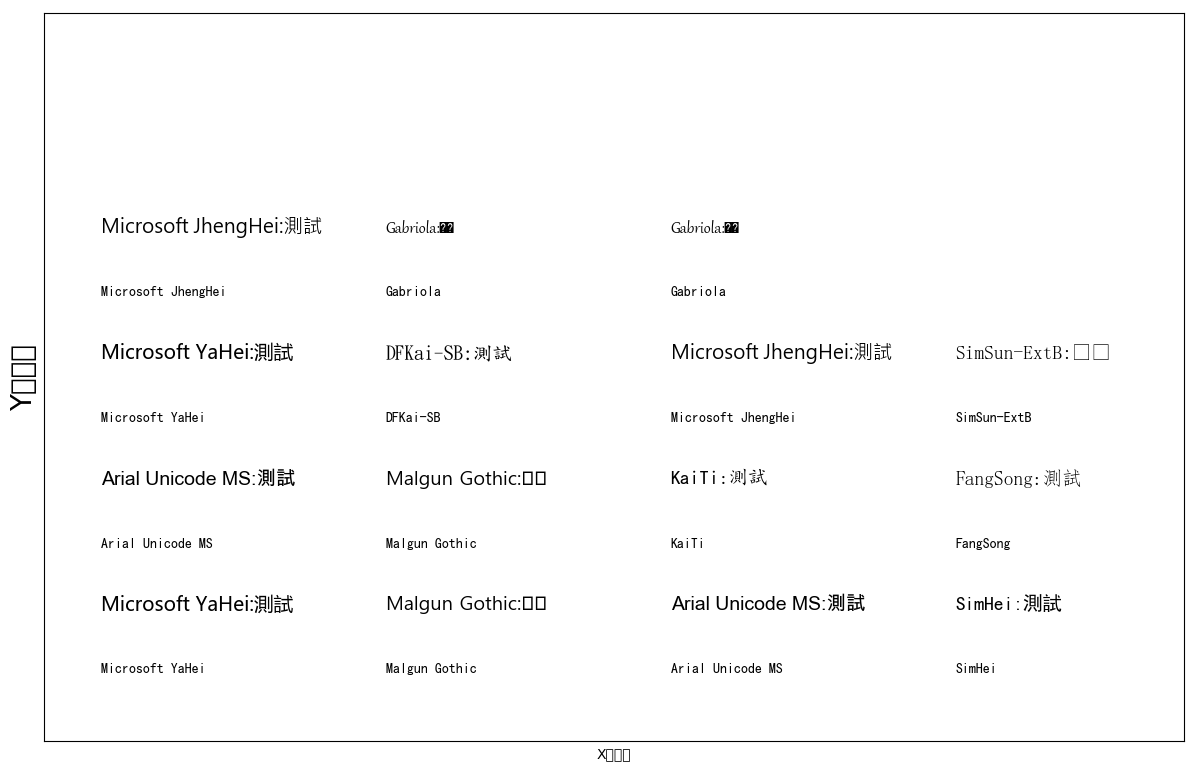

In [26]:
from matplotlib.font_manager import fontManager 
import matplotlib.pyplot as plt 
import os 
import os.path 
fig = plt.figure(figsize=(12,8)) 
ax = fig.add_subplot(111) 
plt.subplots_adjust(0.04, 0.04, 0.99, 0.95, 0, 0) 
plt.xticks([]) 
plt.yticks([]) 
x, y = 0.05, 0.18 
fonts = [font.name for font in fontManager.ttflist if os.path.exists(font.fname) and os.stat(font.fname).st_size>1e6] 
font = set(fonts) 
dy = (1.0-y)/(len(fonts)/4 + (len(fonts)%4!=0)) 
for font in fonts: 
    t = ax.text(x, y, font+":"+u"測試", {'fontname':font, 'fontsize':14}, transform=ax.transAxes) 
    ax.text(x, y-dy/2, font, transform=ax.transAxes) 
    x += 0.25 
    if x >= 1.0: 
        y += dy 
        x = 0.05 
ax.set_xlabel(u'X軸座標',{'fontname':'STKaiti'})
ax.set_ylabel(u'Y軸座標',{'fontname':'STHupo','fontsize':20})
plt.show()

Populating the interactive namespace from numpy and matplotlib


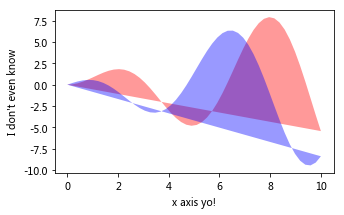

In [35]:
%pylab inline

x = np.linspace(0, 10)
y1 = x * np.sin(x)
y2 = x * np.cos(x)

plt.figure(figsize=(5,3)) 
plt.fill(x, y1, 'red', alpha=0.4)
plt.fill(x, y2, 'blue', alpha=0.4)
plt.xlabel('x axis yo!')
plt.ylabel("I don't even know")

# 1. 子圖plt.axes
- figure對象是一個頂級容器，用來放置、布局子繪圖組件，可以進一步將figure劃分多個子區域，這就像一個文件櫃被劃分為多個格子或抽屜一樣。
- Axes是Figure子容器中最重要的一個子容器。
- Axes是一個矩形區域，這個矩形是基於figure坐標系統定義的。
- Axes也是matplotlib框架中一個重要的類對象，但首先要把它理解為figure中的一個子矩形區域。所以，本文我都會這樣稱呼它。
- 建立坐標軸最基本的方法就是使用plt.axes 函數。這個函數的默認配置是創建一個標準的坐標軸，填滿整張圖。它還有一個可選參數，由圖形坐標系統的四個值構成。
- 這四個值分別表示圖形坐標系統的 bottom, left, width, height(下、左、寬、高)，數值的取值範圍是左下角(原點)為 0，右上角為 1。

Populating the interactive namespace from numpy and matplotlib


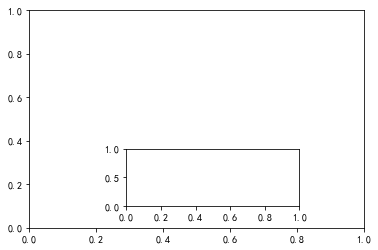

In [2]:
%pylab inline

ax1 = plt.axes()
ax2 = plt.axes([0.35, 0.20, 0.4, 0.2])
plt.show()

Populating the interactive namespace from numpy and matplotlib


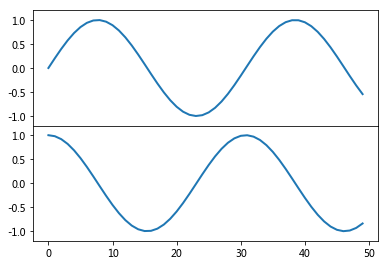

In [37]:
%pylab inline

plt.rcParams['axes.unicode_minus'] = False
fig = plt.figure() 
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2)) 
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2)) 
x = np.linspace(0, 10) 
ax1.plot(np.sin(x)) 
ax2.plot(np.cos(x))
plt.show()

# 2. 網格圖 plt.subplot 
- 建立的網格子圖行數、列數和索引值，索引值從 1 開始，從左上角到 右下角依次增加編號

### [線上文件](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplot.html)

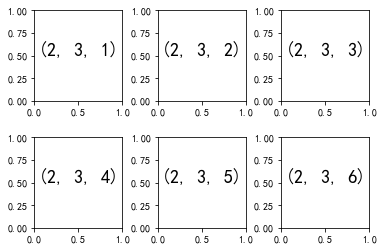

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure() 
fig.subplots_adjust(hspace=0.4, wspace=0.4) #調整子圖之間的間隔
for i in range(1, 7): 
    ax = fig.add_subplot(2, 3, i) 
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')
plt.show()

Populating the interactive namespace from numpy and matplotlib


(-1.2, 1.2)

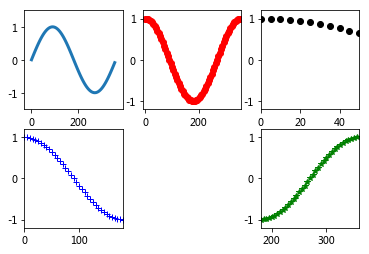

In [14]:
%pylab inline
x1 = np.arange(0, 360, 5)
y1 = np.sin(x1 * np.pi/180.0)
x2 = x1
y2 = np.cos(x2 * np.pi / 180.0)

plt.subplot(231)
plt.plot(x1, y1, lw = 3)
plt.xlim(-30, 390)
plt.ylim(-1.5, 1.5)

plt.subplot(232)
plt.plot(x2, y2, 'ro')
plt.xlim(-10, 360)
plt.ylim(-1.2, 1.2)

plt.subplot(233)
plt.plot(x2, y2, 'ko')
plt.xlim(0, 50)
plt.ylim(-1.2, 1.2)

plt.subplot(234)
plt.plot(x2, y2, 'b+')
plt.xlim(0, 180)
plt.ylim(-1.2, 1.2)

plt.subplot(236)
plt.plot(x2, y2, 'g*')
plt.xlim(180, 360)
plt.ylim(-1.2, 1.2)

# 3. 快速建立網格plt.subplots
- 坐標軸實例網格的返回結果是一個 NumPy 陣列，這樣就可以通過標準的陣列取值方式輕鬆獲取想要的坐標軸了。
- 建立一個 2×3 網格子圖，每行的 3 個子圖使用相同的 y 軸坐標，每列的 2 個子圖 使用相同的 x 軸坐標

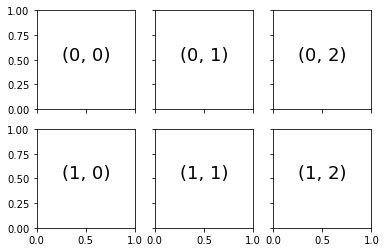

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
for i in range(2): 
    for j in range(3): 
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center') 
fig

# 4. 複雜的排列方式plt.GridSpec
- 如果想實現不規則的多行多列子圖網格，plt.GridSpec() 是最好的工具。

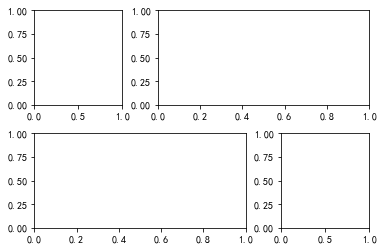

In [21]:
import matplotlib.pyplot as plt
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:]) 
plt.subplot(grid[1, :2]) 
plt.subplot(grid[1, 2])    
plt.show()

# 繪圖樣式設定
### [文件說明](https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html)

Populating the interactive namespace from numpy and matplotlib


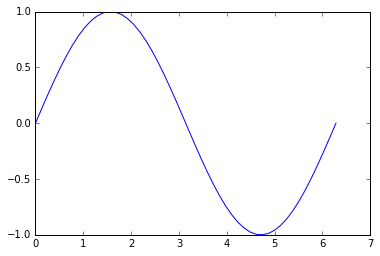

In [13]:
%pylab inline
x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
plt.plot(x, y)

In [6]:
%pylab inline
#查詢支援樣式
print(plt.style.available)

Populating the interactive namespace from numpy and matplotlib
['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', '_classic_test']


Populating the interactive namespace from numpy and matplotlib


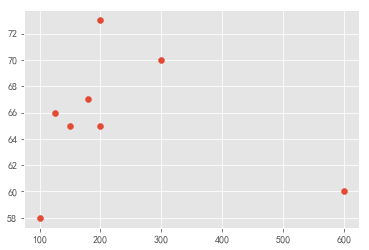

In [22]:
%pylab inline

weight = [600,150,200,300,200,100,125,180]
height = [60,65,73,70,65,58,66,67]
plt.style.use(('ggplot')) #ggplot(跟R中的ggplot類似)
plt.scatter(weight, height)

# 恢復預設參數設定
- matplotlib.rcdefaults() 恢復成 matplotlib 內建的樣式
- matplotlib.rc_file_defaults() 恢復成最初導入的 rc 檔定義的樣式。

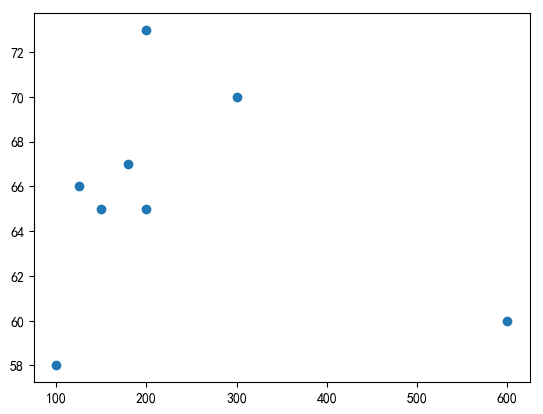

In [24]:
import matplotlib

matplotlib.rcdefaults()
matplotlib.rc_file_defaults()
weight = [600,150,200,300,200,100,125,180]
height = [60,65,73,70,65,58,66,67]
plt.scatter(weight, height)

# 暫時修改

Populating the interactive namespace from numpy and matplotlib


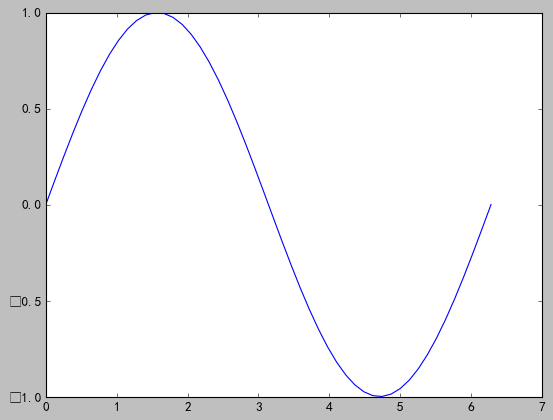

In [3]:
%pylab inline
x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
with plt.style.context(('classic')):
    plt.plot(x, y)

Populating the interactive namespace from numpy and matplotlib


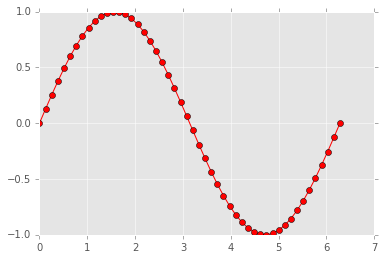

In [15]:
%pylab inline
x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
with plt.style.context(['dark_background', 'ggplot']):
    plt.plot(x, y, 'r-o')

# 開啟手寫風格模式

Populating the interactive namespace from numpy and matplotlib


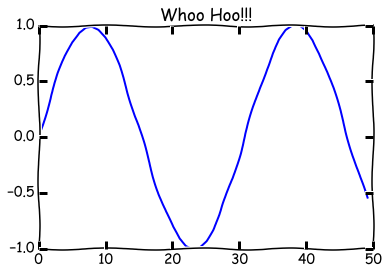

In [6]:
%pylab inline

with plt.xkcd():
    plt.xkcd() # 開啟手寫風格模式
    plt.plot(sin(linspace(0, 10)))
    plt.title('Whoo Hoo!!!')